In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

max_img = cv2.imread("/data/processed/images/ext_max.png")
# max_img = cv2.cvtColor(max_img, cv2.COLOR_BGR2GRAY)
min_img = cv2.imread("/data/processed/images/ext_min.png")
# min_img = cv2.cvtColor(min_img, cv2.COLOR_BGR2GRAY)
img = max_img


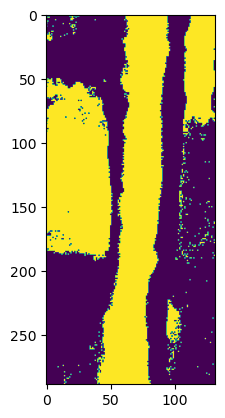

In [2]:
gray = 1-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# blur = cv2.GaussianBlur(gray,(5,5),0)
# _,th = cv2.threshold(blur, 0 , 255 ,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# vis = np.hstack((img,th))
plt.imshow(th)

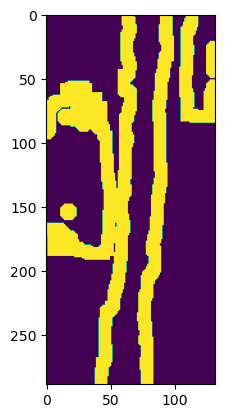

In [3]:
# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(th,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)

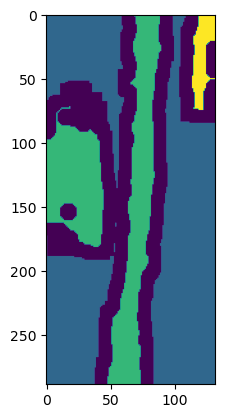

In [4]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

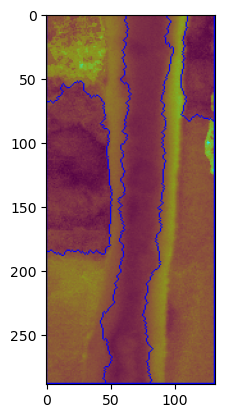

In [5]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]
plt.imshow(img)